In [2]:
import pandas as pd

In [4]:
house_df = pd.read_excel("C:/Users/msabo/Downloads/kc_house_data.xlsx", sheet_name = "data")
house_df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


### 1. Plot a heatmap of correlation and find pairs of strongly correlated variables (>0.75). Assume building a predictive model to predict the price of a house; what are the candidate variables to drop to avoid multicollinearity? There are multiple scenarios, list only one scenario.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

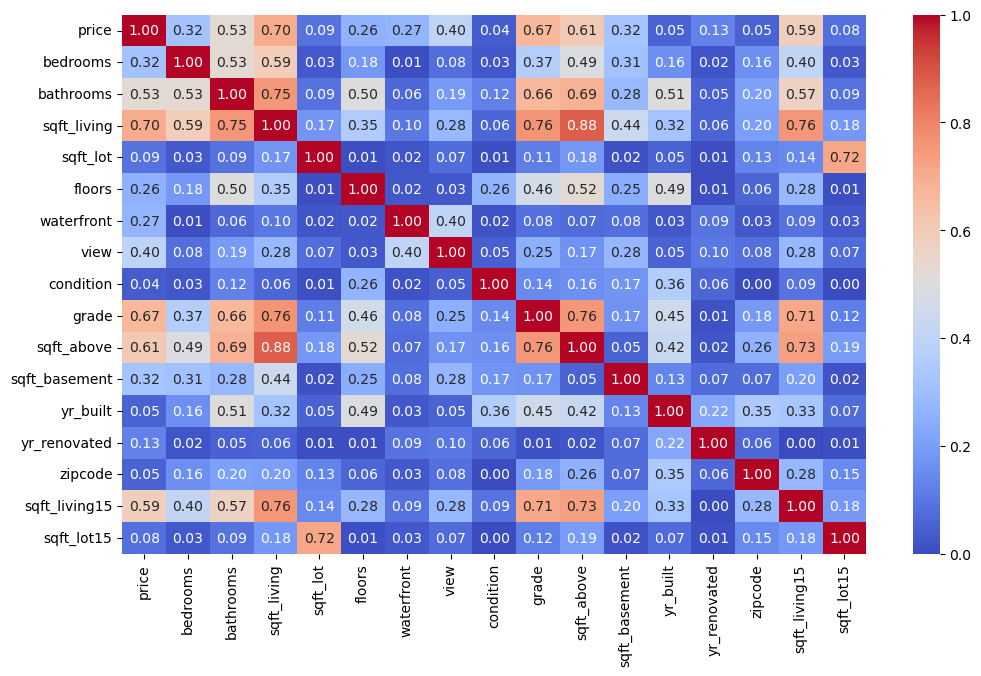

In [7]:
corr_filt = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15']
corr = house_df[corr_filt].corr().abs()
fig, axes= plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(12, 7)
sns.heatmap(corr, annot = True, fmt = ".2f", vmin = 0, vmax = 1, cmap = "coolwarm", center = 0.5, ax = axes)
plt.show()

##### To avoid multicollinearity, one potential group variables to drop could be "bathrooms", "sqft_living15", "sqft_above", and "grade".

### 2. Assume that in problem 1, you decided to exclude the following variables from you model to prevent multicollinearity: grade, sqft_above, bathrooms, and sqft_living15. Answer the following questions after excluding these variables from your analysis (in addition to id, date, lat, and long). Use 60% of the data for training and 40% for testing the model and apply dummy transformation for only nominal categorical variables. Build an MLR model to predict price. How many variables does your model have? What is the predictive accuracy of the model (report MAPE and round it up to two decimals)?

In [12]:
from dmba import exhaustive_search, adjusted_r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary

In [14]:
predictors = house_df.columns.drop(["price", "id", "date", "lat", "long", "grade", "sqft_above", "bathrooms", "sqft_living15"])
outcome = "price"
X = pd.get_dummies(house_df[predictors], columns=["zipcode"], drop_first = True)
Y = house_df[outcome]

In [17]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.4, random_state = 1)

In [19]:
house_lm = LinearRegression()
house_lm.fit(train_X, train_Y)

LinearRegression()

In [21]:
variables = pd.DataFrame({"Predictor": X.columns, "Coefficient": house_lm.coef_})
intercept = pd.DataFrame({"Predictor": "y-intercept", "Coefficient": house_lm.intercept_}, index = [0])
coeff = pd.concat([variables, intercept], ignore_index = True)
coeff

,Predictor,Coefficient
0,bedrooms,-31965.497268
1,sqft_living,273.208203
2,sqft_lot,0.181364
3,floors,-35866.879514
4,waterfront,597350.463832
...,...,...
76,zipcode_98178,40639.090746
77,zipcode_98188,32135.678306
78,zipcode_98198,3766.326963
79,zipcode_98199,442876.688908


In [23]:
print("Error for training set: ")
regressionSummary(train_Y, house_lm.predict(train_X))

print("\n-----------\n\nError for test set: ")
regressionSummary(test_Y, house_lm.predict(test_X))

Error for training set: 

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 157576.6313
            Mean Absolute Error (MAE) : 97478.9274
          Mean Percentage Error (MPE) : -1.6819
Mean Absolute Percentage Error (MAPE) : 19.8697

-----------

Error for test set: 

Regression statistics

                      Mean Error (ME) : 1180.3863
       Root Mean Squared Error (RMSE) : 176911.7247
            Mean Absolute Error (MAE) : 101222.1574
          Mean Percentage Error (MPE) : -1.3859
Mean Absolute Percentage Error (MAPE) : 20.1101


##### The model ended up with 81 predictors after changing zipcode into a dummy variable. The MAPE of the training set is 19.87 and the MAPE of the test set is 20.11.

### 3. Check the coefficient of bedrooms in the model you built in problem 2. How do you interpret that? Do you agree with what you see? What do you think might be the issue?

##### The coefficient for "bedrooms" in #2 is -31965.497268, which seems off. This would imply that with every additional bedroom a house has, the price of the house will decrease by 31965.497268. There is definitely something wrong with this, since the number of bedrooms going up would normally raise the price of the house. There is likely too many predictors in the model after question #2, which may be skewing some of the more predictive variables such as "bedrooms" and "floors".

### 4. Now let's revists the heatmap correlation in problem 1 and include domain knowledge in finding which variables to drop to prevent multicollinearity. This time only exclude sqft_living and sqft_above to prevent multicollinearity. Build a multiple linear regression model to predict price using all variables except sqft_living, sqft_above, date, lat, and long. What is the coefficient of bedrooms in the model? Does the new model have a higher predictive accuracy than the one you built in problem 2?

In [99]:
predictors4 = house_df.columns.drop(["price", "id", "date", "lat", "long", "sqft_above", "sqft_living"])
outcome4 = "price"
X4 = pd.get_dummies(house_df[predictors4], columns=["zipcode"], drop_first = True)
Y4 = house_df[outcome4]

In [81]:
train_X4, test_X4, train_Y4, test_Y4 = train_test_split(X4, Y4, test_size = 0.4, random_state = 1)

In [83]:
house_lm4 = LinearRegression()
house_lm4.fit(train_X4, train_Y4)

LinearRegression()

In [85]:
variables4 = pd.DataFrame({"Predictor": X4.columns, "Coefficient": house_lm4.coef_})
intercept4 = pd.DataFrame({"Predictor": "y-intercept", "Coefficient": house_lm4.intercept_}, index = [0])
coeff4 = pd.concat([variables4, intercept4], ignore_index = True)
coeff4

,Predictor,Coefficient
0,bedrooms,5.148433e+03
1,bathrooms,7.638959e+04
2,sqft_lot,2.811339e-01
3,floors,5.313577e+03
4,waterfront,6.500434e+05
...,...,...
78,zipcode_98178,2.486647e+04
79,zipcode_98188,3.656891e+04
80,zipcode_98198,1.660964e+02
81,zipcode_98199,3.229988e+05


In [87]:
print("Error for training set: ")
regressionSummary(train_Y4, house_lm4.predict(train_X4))

print("\n-----------\n\nError for test set: ")
regressionSummary(test_Y4, house_lm4.predict(test_X4))

Error for training set: 

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 168075.5033
            Mean Absolute Error (MAE) : 102280.0188
          Mean Percentage Error (MPE) : -1.7132
Mean Absolute Percentage Error (MAPE) : 21.1482

-----------

Error for test set: 

Regression statistics

                      Mean Error (ME) : 2615.9008
       Root Mean Squared Error (RMSE) : 191832.5785
            Mean Absolute Error (MAE) : 106039.0982
          Mean Percentage Error (MPE) : -1.3461
Mean Absolute Percentage Error (MAPE) : 21.3861


##### The new coefficient for "bedrooms" is 5,148.43, which makes a lot more sense in the context. The new model's predictive accuracy is marginally higher, rising from a MAPE of 19-20 to about 21 and change.

### 5. Use the Backward elimination algorithm to reduce the dimension of the model you built in problem 4 and report which variables this method keeps. Get the MAE and MAPE of the best model on both training and test sets.

In [91]:
from dmba import backward_elimination, AIC_score

In [105]:
def train_model(variables4):
    model = LinearRegression()
    model.fit(train_X4[variables4], train_Y4)
    return model

def score_model(model, variables4):
    return AIC_score(train_Y4, model.predict(train_X4[variables4]), model)

In [107]:
best_model, best_variables = backward_elimination(train_X4.columns, train_model, score_model, verbose=True)
print(best_variables)

Variables: bedrooms, bathrooms, sqft_lot, floors, waterfront, view, condition, grade, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15, zipcode_98002, zipcode_98003, zipcode_98004, zipcode_98005, zipcode_98006, zipcode_98007, zipcode_98008, zipcode_98010, zipcode_98011, zipcode_98014, zipcode_98019, zipcode_98022, zipcode_98023, zipcode_98024, zipcode_98027, zipcode_98028, zipcode_98029, zipcode_98030, zipcode_98031, zipcode_98032, zipcode_98033, zipcode_98034, zipcode_98038, zipcode_98039, zipcode_98040, zipcode_98042, zipcode_98045, zipcode_98052, zipcode_98053, zipcode_98055, zipcode_98056, zipcode_98058, zipcode_98059, zipcode_98065, zipcode_98070, zipcode_98072, zipcode_98074, zipcode_98075, zipcode_98077, zipcode_98092, zipcode_98102, zipcode_98103, zipcode_98105, zipcode_98106, zipcode_98107, zipcode_98108, zipcode_98109, zipcode_98112, zipcode_98115, zipcode_98116, zipcode_98117, zipcode_98118, zipcode_98119, zipcode_98122, zipcode_98125, zipcode_98126, zipcode_

In [133]:
print("Error for training set: ")
regressionSummary(train_Y4, best_model.predict(train_X4[best_variables]))

print("\n-----------\n\nError for test set: ")
regressionSummary(test_Y4, best_model.predict(test_X4[best_variables]))

Error for training set: 


AttributeError: 'list' object has no attribute 'predict'

In [131]:
best_model = ['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98059', 'zipcode_98065', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98199']
count = 0
for var in best_model:
    count+=1
print(count)

73


##### The model will keep the following variables: ['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98059', 'zipcode_98065', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98199']

##### MAE and MAPE for training set: 102307.1116, 21.1610
##### MAE and MAPE for test set: 106069.1942, 21.4045

### 6. Use Lasso to build an MLR model to predict price using all predictor variables you used in problem 4. Find the chosen alpha value using 5-fold cross-validation (over the training set). Print the chosen alpha. Which variables does the model include in the MLR model? Which variables does it drop from the model? Get the MAE and MAPE of the model on both training and test sets.

In [111]:
from sklearn.linear_model import LassoCV

In [120]:
lasso_cv = LassoCV(cv = 5, n_jobs=-1, alphas=[2.55])
lasso_cv.fit(train_X4, train_Y4)

print('Chosen alpha: ', lasso_cv.alpha_)

print('\n\n Error on the training set: ')
regressionSummary(train_Y4, lasso_cv.predict(train_X4))

print('\n\n Error on the test set:')
regressionSummary(test_Y4, lasso_cv.predict(test_X4))

variables4 = pd.DataFrame({'Predictor': X4.columns, 'coefficient': lasso_cv.coef_})
intercept4 = pd.DataFrame({'Predictor': 'y-intercept', 'coefficient': lasso_cv.intercept_}, index=[0])
coeff4 = pd.concat([variables4, intercept4], ignore_index=True)
pd.set_option("display.max_rows", None)
print(coeff4)

Chosen alpha:  2.55


 Error on the training set: 

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 168078.8139
            Mean Absolute Error (MAE) : 102278.6313
          Mean Percentage Error (MPE) : -1.7346
Mean Absolute Percentage Error (MAPE) : 21.1441


 Error on the test set:

Regression statistics

                      Mean Error (ME) : 2628.3925
       Root Mean Squared Error (RMSE) : 191834.5599
            Mean Absolute Error (MAE) : 106049.4627
          Mean Percentage Error (MPE) : -1.3645
Mean Absolute Percentage Error (MAPE) : 21.3871
        Predictor   coefficient
0        bedrooms  5.080474e+03
1       bathrooms  7.642051e+04
2        sqft_lot  2.804533e-01
3          floors  5.448992e+03
4      waterfront  6.495433e+05
5            view  5.163693e+04
6       condition  2.007571e+04
7           grade  1.096876e+05
8   sqft_basement  3.292372e+01
9        yr_built -1.669264e+03
10   yr_renovated  1.16782

##### The model dropped "zipcode_98042", everything else was included. 